<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/1.%20Customer%20Churn/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib -U
# import matplotlib as plt
# plt.__version__

In [2]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 나눔바른고딕체 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


# Telco Customer Churn 고객 유지를 위한 이탈 고객 분석및 해결방안 탐색(나아가 예측모델 만들기)
(Telco Custome Churn EDA)

데이터 선정이유 : 모든회사들은 고객을 가지고 있다. 또한 이런고객들을 새로 유입하는것도 중요하지만, 이미 들어온 고객들을 유지하고 함께 성장하는것또한 매우 중요하다. 이를위해 이탈하는 고객들의 특징을 분석하여, 어떻게 해결할 수 있을지 숨겨진 데이터를 찾으며, 분석해보고 해결해 보고자 한다.

[ 컬 럼 소 개 ]

---

[고객정보]

customerID : 고객 id

gender : 성별

SeniorCitizen : 고령자(yes:1, no:0)

Partner : 파트너

Dependents : 부양 가족

tenure : 보유 개월 수(고객이 머물렀던 개월 수)

---

[서비스]

PhoneService : 휴대폰 서비스

MultipleLines : 여러회선 여부( 예, 아니오, 전화 서비스 없음)

InternetService : 인터넷 서비스(인터넷 서비스 제공없체: DSL, 광섬유, 아니요)

OnlineSecurity : 온라인 보안 여부(예, 아니오, 전화서비스 없음)

OnlineBackup : 온라인 백업 여부(예, 아니오, 전화서비스 없음)

DeviceProtection : 장치보호 여부(예, 아니요, 인터넷 서비스 없음)

TechSupport : 기술지원 여부(예, 아니요, 인터넷 서비스 없음)

StreamingTV : StreamingTV보유 여부(예, 아니요, 인터넷 서비스 없음)

StreamingMovies : 스트리밍 영화 보유 여부(예, 아니요, 인터넷 서비스 없음)

---
[계약 및 요금]

Contract : 계약(계약기간 월간, 1년, 2년)

PaperlessBilling : 종이없는 결제(예, 아니요)

PaymentMethod : 고객의 결제 수단 (전자 수표(Electronic check), 우편 수표(Mailed check), 은행 송금 (자동)(Bank transfer (automatic)), 신용 카드 (자동)(Credit card (automatic)))

MonthlyCharges : 월간 요금

TotalCharges : 총 요금

---

Churn : 지난달 퇴사한 고객

In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [5]:
# 데이터 불러오기 
data = pd.read_csv('/content/Raw_data.csv')

# 군집화를 위한 기본 전처리

In [6]:
# 데이터확인
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# 결측값확인
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

결측값이 없고, 7043개의 데이터가 존재한다.

데이터 타입 일부 변경(결측값은 나중에 다루기로 한다.)

In [9]:
# object타입을 numeric타입으로 변경
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ',''))
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
# numerical 데이터 분포확인
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# 중복값 확인
data.duplicated().sum()

0

In [12]:
# 기본전처리된 기본 테이블 복사
df = data.copy()

In [13]:
# 고객의 ID는 필요하지 않기 때문에 제거해준다.
data = data.iloc[:,1:]
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 클러스터링을 통한 고객 세분화

클러스터링 이후 세부 EDA를 진행하는 순서를 만든 이유: 거시적인 관점에서 크게 고객을 분류하여 기본적인 전략을 구상하고 미시적으로 접근하여 특성별로(요인별로)개선할 방법을 찾으면 거시적인 시점에서 어느정도 정리가 되어있으므로 시간이 부족하여 일부 디테일한 분석을 하지못하여도 기본적인 전략을 미리 구상했기때문에 효과적이라고 생각하였기 때문에 이러한 순서로 진행하였다.

## 알맞은 속성 선택

In [14]:
# 결측값확인
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# 테이블 수정

# 결측값 제거
df = df.dropna()
# 인덱스 초기화
df = df.reset_index()
# 인덱스 컬럼제거
df = df.drop(columns = 'index')
# 기본전처리된 테이블 복사
left_table = df.copy()
# 고객id저장
customerID = df['customerID']
# 고객id 테이블에서 제거
df = df.iloc[:,1:]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
# 군집의 목적에 맞는 특성 선별(서비스 유지기간과 지불하는 비용에 따른 segmentation)
columns_list = ['tenure', 'MonthlyCharges', 'TotalCharges']
df = df[columns_list]
df

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


## 이상치 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


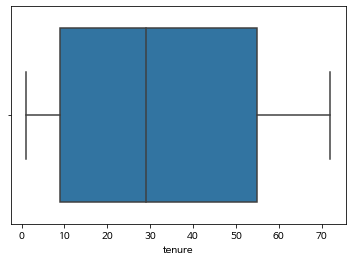

In [17]:
sns.boxplot(df['tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


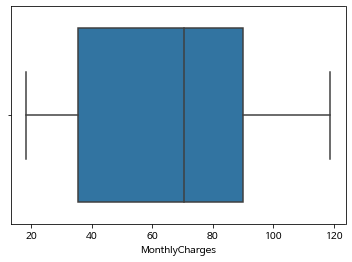

In [18]:
sns.boxplot(df['MonthlyCharges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


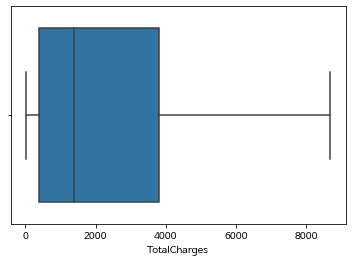

In [19]:
sns.boxplot(df['TotalCharges'])

## 데이터 스케일링

In [20]:
# 이상치가 없기때문에 표준화를 통해 스케일링 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


## 군집알고리즘 선택

비계층적 군집인 k-means알고리즘을 사용할 것이다.

이유는 고객의 유형을 등록기간과 지불하는 비용에 따라 (최우수,우수,일반)고객 혹은 (우수, 일반)고객 으로 분리할것이기 때문에 k값이 일정범위로 정해져있으며 덴드로그램을 통해서 어떻게 형성되었는지 확인하고 싶은것이 아닌 k-means를 통해 최적의 k값을 확인후 2개 혹은 3개로 적용할 것이다.

## 최적의 클러스터링 개수 구하기

In [21]:
# Elbow Method
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

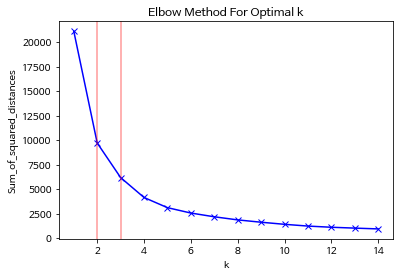

In [22]:
# Elbow Method Visualization
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [23]:
# silhouette score
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, init = 'k-means++',random_state=200)
  kmeans.fit(df)
  clusters = kmeans.predict(df)

  score = silhouette_score(df, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.4795243516623505
k : 3 score : 0.4515887007778933
k : 4 score : 0.4720646569227696
k : 5 score : 0.4435694648385599
k : 6 score : 0.43762327447270166
k : 7 score : 0.4325656853444964
k : 8 score : 0.42750494786640314
k : 9 score : 0.4323670070666531
k : 10 score : 0.4348434189764474
k : 11 score : 0.42843698204087594
k : 12 score : 0.43055952779266554
k : 13 score : 0.427046956530114
best n : 2 best score : 0.4795243516623505


Elbow Method 와 silhouette score 두가지로 확인해본 결과 2개의 군집으로 하는것이 가장 좋아보인다.

## 최적의 군집수 적용

In [24]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)
kmeans.fit(df)
df['고객유형'] = kmeans.labels_
df['고객유형']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0       0
1       0
2       0
3       0
4       0
       ..
7027    0
7028    1
7029    0
7030    0
7031    1
Name: 고객유형, Length: 7032, dtype: int32

In [25]:
# 군집갯수 확인
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 4672, 1: 2360})

In [26]:
# 군집이후 데이터 확인
df

,tenure,MonthlyCharges,TotalCharges,고객유형
0,-1.280248,-1.161694,-0.994194,0
1,0.064303,-0.260878,-0.173740,0
2,-1.239504,-0.363923,-0.959649,0
3,0.512486,-0.747850,-0.195248,0
4,-1.239504,0.196178,-0.940457,0
...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0
7028,1.612573,1.276493,2.241056,1
7029,-0.872808,-1.170004,-0.854514,0
7030,-1.158016,0.319168,-0.872095,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


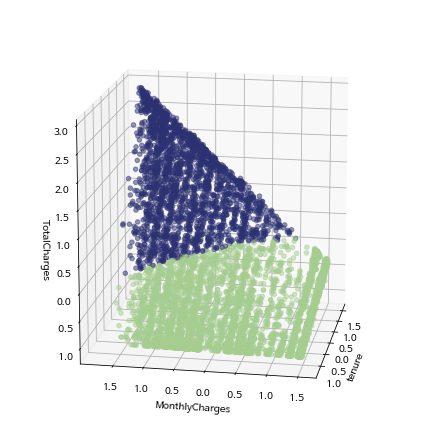

In [27]:
# 차원축소하지않고 3차원인 상태에서 시각화
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=190)
ax.scatter(df['tenure'],df['MonthlyCharges'],df['TotalCharges'],c=df['고객유형'],alpha=0.5,cmap='crest')
ax.set_xlabel('tenure')
ax.set_ylabel('MonthlyCharges')
ax.set_zlabel('TotalCharges')

plt.show()

최적의 군집이라고 나온 2개로 나누어본 결과를 보면 월간요금이나 기간에 따른 구분이 힘들어보이고 TotalCharges위주로 구분이 된것으로 보인다. 2개로 구분하는것은 좋은 방법이 맞을까 라는 의문이 든다. 아래 plotly를 이용하여 자세히 살펴보자

In [28]:
import plotly.graph_objects as go
line=go.Scatter3d(x=df['MonthlyCharges'],
                  y=df['tenure'],
                  z=df['TotalCharges'])
fig=go.Figure(line)
fig.update_layout(title='Impact of rating and rating count to sales',
                  height = 1000,
                  width = 1000,
                  scene = dict(
                  xaxis_title='MonthlyCharges',
                  yaxis_title='tenure',
                  zaxis_title='TotalCharges'))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



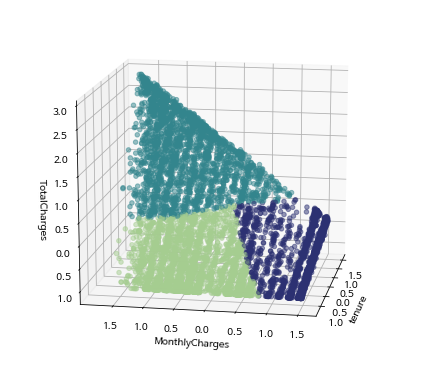

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



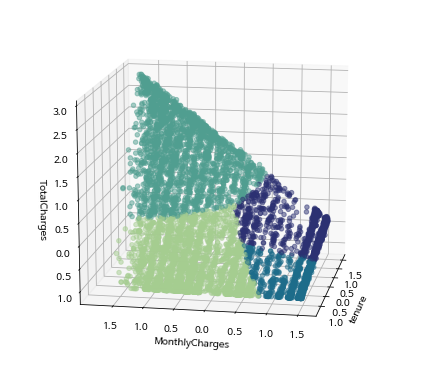

In [29]:
# k값을 3,4개인 경우 각각 시각화 (이후는 비효율적: 실루엣 계수)
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


for i in range(3,5):

  kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
  kmeans.fit(df)
  df['고객유형'] = kmeans.labels_

  



  fig, ax = plt.subplots(ncols=2,figsize = (6,5))
  ax[i-3] = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=190)
  ax[i-3].scatter(df['tenure'],df['MonthlyCharges'],df['TotalCharges'],c=df['고객유형'],alpha=0.5,cmap='crest')
  ax[i-3].set_xlabel('tenure')
  ax[i-3].set_ylabel('MonthlyCharges')
  ax[i-3].set_zlabel('TotalCharges')
  plt.show()

k가 3개일때를 보면 월지불금액으로 나누어지지만 가입기간은 고려되지 않기때문에 k가 4개일때 가입기간이 작고, 월간요금과, 총요금이 작은그룹이 가장 작은 하나의 그룹이 되는것이 더 좋아보이고, 전략을 세우는데 있어서도 좀더 디테일하게 특정 고객층을 타겟하기 쉬울것같다.

In [30]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
kmeans.fit(df)
df['고객유형'] = kmeans.labels_
df['고객유형']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       1
1       0
2       0
3       3
4       0
       ..
7027    0
7028    2
7029    1
7030    0
7031    2
Name: 고객유형, Length: 7032, dtype: int32

In [31]:
# 군집갯수 확인
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 2570, 1: 1212, 2: 2244, 3: 1006})

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



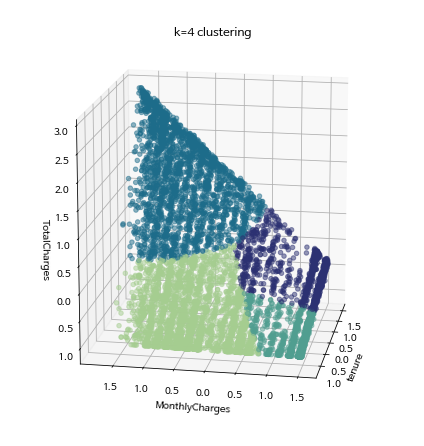

In [32]:
# 차원축소하지않고 3차원인 상태에서 시각화
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=190)
ax.scatter(df['tenure'],df['MonthlyCharges'],df['TotalCharges'],c=df['고객유형'],alpha=0.5,cmap='crest')
ax.set_xlabel('tenure')
ax.set_ylabel('MonthlyCharges')
ax.set_zlabel('TotalCharges')


plt.title('k=4 clustering')
plt.show()

최우수고객(청녹색) : 기간도오랜기간 있었으며, 월지불요금이 많아 총요금또한 매우높은 고객군

장기알뜰고객(남색) : 오랜기간 가입했지만, 월지불요금이 작은그룹(하지만 오랜기간 유지했기때문에 총요금은 결코 낮지않다.)

월지출우수고객(연두색) : 해당고객층이 월지불요금이 가장 많은 구성원들이며, 통신유지 기간은 짧은고객부터 긴 고객층까지 다양하게 분포되어 있다.

일반고객(초록색) : 월지출 비용이 많지않으며 오래유지한 고객역시 소수만 포함된다.

In [33]:
# 차원축소를 통한 2차원 시각화 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df)
pca_transformed

array([[-1.73371511,  0.89126235],
       [-0.77709058, -0.42390716],
       [-2.00912724, -0.27876872],
       ...,
       [-1.4185576 ,  0.90851148],
       [-1.73611061, -0.81924569],
       [ 2.67984408, -1.0460393 ]])

In [34]:
# 데이터프레임에 차원축소한 컬럼을 넣어주기
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tenure,MonthlyCharges,TotalCharges,고객유형,pca_x,pca_y
0,-1.280248,-1.161694,-0.994194,1,-1.733715,0.891262
1,0.064303,-0.260878,-0.173740,0,-0.777091,-0.423907
2,-1.239504,-0.363923,-0.959649,0,-2.009127,-0.278769
3,0.512486,-0.747850,-0.195248,3,0.921244,1.670135
4,-1.239504,0.196178,-0.940457,0,-1.853955,-0.714892
...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,-0.752371,-1.200924
7028,1.612573,1.276493,2.241056,2,2.930504,-1.019996
7029,-0.872808,-1.170004,-0.854514,1,-1.418558,0.908511
7030,-1.158016,0.319168,-0.872095,0,-1.736111,-0.819246


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



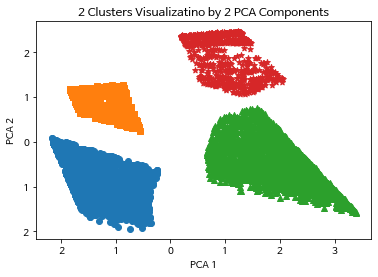

In [35]:
# 군집값이 0,1인 경우 별도 인덱스 추출
marker0_ind = df[df['고객유형']==0].index
marker1_ind = df[df['고객유형']==1].index
marker2_ind = df[df['고객유형']==2].index
marker3_ind = df[df['고객유형']==3].index

# 군집 값 0,1에 해당하는 인데스로 각 군집 레벨의 pca_x, pca_y값 추z출
plt.scatter(x = df.loc[marker0_ind,'pca_x'], y = df.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = df.loc[marker1_ind,'pca_x'], y = df.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = df.loc[marker2_ind,'pca_x'], y = df.loc[marker2_ind, 'pca_y'], marker = '^')
plt.scatter(x = df.loc[marker3_ind,'pca_x'], y = df.loc[marker3_ind, 'pca_y'], marker = '*')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Clusters Visualizatino by 2 PCA Components')
plt.show()

In [36]:
df.groupby('고객유형').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')

,tenure,MonthlyCharges,TotalCharges,pca_x,pca_y
고객유형,,,,,
2,1.001123,0.880046,1.284438,1.933121,-0.509673
3,0.851277,-1.124779,-0.298200,0.965009,2.033931
0,-0.819905,0.302516,-0.595645,-1.387048,-0.845138
1,-0.821576,-1.337262,-0.867559,-1.438951,1.047505


최우수고객(2,청녹색) : 기간도오랜기간 있었으며, 월지불요금이 많아 총요금또한 매우높은 고객군

장기알뜰고객(3,남색) : 오랜기간 가입했지만, 월지불요금이 작은그룹(하지만 오랜기간 유지했기때문에 총요금은 결코 낮지않다.)

월지출우수고객(0,연두색) : 해당고객층이 월지불요금이 가장 많은 구성원들이며, 통신유지 기간은 짧은고객부터 긴 고객층까지 다양하게 분포되어 있다.

일반고객(1초록색) : 월지출 비용이 많지않으며 오래유지한 고객역시 소수만 포함된다.

로우데이터와 합쳐서 의미 뽑아내기

In [37]:
# 고객id와 고객유형을 매치시키기 위해 미리저장해둔 고객id불러오기
df['customerID'] = customerID
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tenure,MonthlyCharges,TotalCharges,고객유형,pca_x,pca_y,customerID
0,-1.280248,-1.161694,-0.994194,1,-1.733715,0.891262,7590-VHVEG
1,0.064303,-0.260878,-0.173740,0,-0.777091,-0.423907,5575-GNVDE
2,-1.239504,-0.363923,-0.959649,0,-2.009127,-0.278769,3668-QPYBK
3,0.512486,-0.747850,-0.195248,3,0.921244,1.670135,7795-CFOCW
4,-1.239504,0.196178,-0.940457,0,-1.853955,-0.714892,9237-HQITU
...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0,-0.752371,-1.200924,6840-RESVB
7028,1.612573,1.276493,2.241056,2,2.930504,-1.019996,2234-XADUH
7029,-0.872808,-1.170004,-0.854514,1,-1.418558,0.908511,4801-JZAZL
7030,-1.158016,0.319168,-0.872095,0,-1.736111,-0.819246,8361-LTMKD


In [38]:
# 고객유형 value변경
cluster_list = []
for i in df['고객유형']:
  if i == 2:
    cluster_list.append('최우수 고객')
  elif i == 3:
    cluster_list.append('장기알뜰 고객')
  elif i == 0:
    cluster_list.append('월지출우수 고객')
  elif i == 1:
    cluster_list.append('일반 고객')
    
  

df['고객유형'] = cluster_list
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tenure,MonthlyCharges,TotalCharges,고객유형,pca_x,pca_y,customerID
0,-1.280248,-1.161694,-0.994194,일반 고객,-1.733715,0.891262,7590-VHVEG
1,0.064303,-0.260878,-0.173740,월지출우수 고객,-0.777091,-0.423907,5575-GNVDE
2,-1.239504,-0.363923,-0.959649,월지출우수 고객,-2.009127,-0.278769,3668-QPYBK
3,0.512486,-0.747850,-0.195248,장기알뜰 고객,0.921244,1.670135,7795-CFOCW
4,-1.239504,0.196178,-0.940457,월지출우수 고객,-1.853955,-0.714892,9237-HQITU
...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,월지출우수 고객,-0.752371,-1.200924,6840-RESVB
7028,1.612573,1.276493,2.241056,최우수 고객,2.930504,-1.019996,2234-XADUH
7029,-0.872808,-1.170004,-0.854514,일반 고객,-1.418558,0.908511,4801-JZAZL
7030,-1.158016,0.319168,-0.872095,월지출우수 고객,-1.736111,-0.819246,8361-LTMKD


In [39]:
# 고객유형 분포
df['고객유형'].value_counts()

월지출우수 고객    2570
최우수 고객      2244
일반 고객       1212
장기알뜰 고객     1006
Name: 고객유형, dtype: int64

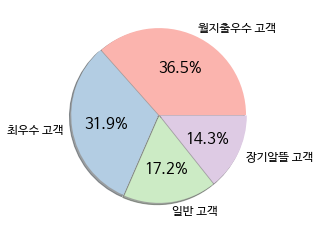

In [40]:
# figure기본 옵션 세팅
sns.set_context('notebook')
sns.set_palette('Pastel1')

sizes = [2570/7032,2244/7032,1212/7032,1006/7032]
labels = ['월지출우수 고객', '최우수 고객', '일반 고객', '장기알뜰 고객']


pathes, texts, autotexts = plt.pie(sizes,
                                   labels = labels,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.01,0.01,0.01))

for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

for t in autotexts:
  t.set_color('black')
  t.set_fontsize(15)



여기까지 봤을때 해당 통신사는 월지출우수 고개과 최우수 고객이 가장많기 때문에 비즈니스를 잘 하고 있다는 것을 알 수 있다.

In [41]:
# 고객유형과 고객id테이블 만들기
right_table = df[['customerID', '고객유형']]
right_table

,customerID,고객유형
0,7590-VHVEG,일반 고객
1,5575-GNVDE,월지출우수 고객
2,3668-QPYBK,월지출우수 고객
3,7795-CFOCW,장기알뜰 고객
4,9237-HQITU,월지출우수 고객
...,...,...
7027,6840-RESVB,월지출우수 고객
7028,2234-XADUH,최우수 고객
7029,4801-JZAZL,일반 고객
7030,8361-LTMKD,월지출우수 고객


In [42]:
# 사전에 복사해둔 테이블 불러오기
left_table

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [43]:
# 고객id를 기준으로 두 테이블 합치기
# 합치는 이유는 군집화한 테이블은 scale변경을 시켜주었기때문에 
# 기존테이블의 고객에게 고객유형을 그대로 할당하여 데이터를 요약하고자함.
Table = pd.merge(left_table, right_table,how = 'inner', on ='customerID')
Table


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,고객유형
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,일반 고객
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,월지출우수 고객
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,월지출우수 고객
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,장기알뜰 고객
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,월지출우수 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,월지출우수 고객
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,최우수 고객
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,일반 고객
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,월지출우수 고객


In [44]:
Table = Table.drop(columns = 'customerID')
Table = pd.get_dummies(Table,drop_first=False) # 모델을 만드는것이 아니기때문에 drop_first를 사용할 필요가없다.
Table

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,고객유형_월지출우수 고객,고객유형_일반 고객,고객유형_장기알뜰 고객,고객유형_최우수 고객
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
7028,0,72,103.20,7362.90,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
7029,0,11,29.60,346.45,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7030,1,4,74.40,306.60,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0


In [45]:
Table.groupby('Churn_Yes').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,고객유형_월지출우수 고객,고객유형_일반 고객,고객유형_장기알뜰 고객,고객유형_최우수 고객
Churn_Yes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.128995,37.650010,61.307408,2555.344141,0.492737,0.507263,0.472400,0.527600,0.656595,0.343405,0.098780,0.901220,0.491187,0.098780,0.410033,0.379043,0.348441,0.272516,0.394344,0.272516,0.333140,0.359094,0.272516,0.368390,0.364710,0.272516,0.362774,0.392408,0.272516,0.335077,0.361611,0.272516,0.365873,0.356963,0.272516,0.370521,0.429983,0.252954,0.317064,0.463878,0.536122,0.248693,0.249661,0.250629,0.251017,1.000000,0.261089,0.192136,0.184776,0.361999
1,0.254682,17.979133,74.441332,1531.796094,0.502408,0.497592,0.642055,0.357945,0.825575,0.174425,0.090958,0.909042,0.454254,0.090958,0.454789,0.245586,0.693954,0.060460,0.781701,0.060460,0.157838,0.659711,0.060460,0.279829,0.647940,0.060460,0.291600,0.773676,0.060460,0.165864,0.504013,0.060460,0.435527,0.501873,0.060460,0.437667,0.885500,0.088818,0.025682,0.250936,0.749064,0.138042,0.124131,0.573034,0.164794,0.000000,0.653826,0.117710,0.027822,0.200642


In [46]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

## 클러스터링을 통한 인사이트 및 전략

< 이탈한 고객의 특징 >
- 노년층이 비 이탈자 보다 2배 많다.
- 가입 유지기간이 비 이탈고객보다 2배 짧다 (17m - 37m)
- 이탈고객의 월청구액이 평균 10달러 높다
- 파트너가 없는경우가 64%이다.
- 부양가족이 없는 경우가 82%이다.
- 인터넷 서비스중에서 Fiber optic 을 사용하는 고객이 무려 69%이다.
- OnlineSecurity를 사용하지 않는 사람이 78%이며, OnlineBackup을 사용하지 않는사람은 65%이다.
- DeviceProtection을 64%가 이용하지 않는다.
- TechSupport를 이용하지 않는 사람이 77%이다. 
- 약89%의 고객이 한달계약을 하고있다.
- 약75%의 고객이 종이없는청구서를 이용하고 있으며 그중 다수가 Electronic check(전자수표)를 이용한다.
- 가장 많은 고객유형은 "월지출 우수고객" 이다

< 월지출 우수 고객 특징 >
- 한달계약이 73%이다. 
- 80%가 부양가족이 없다.
- 97%가 휴대폰 서비스를 이용한다.
- 60%가 인터넷 서비스에서  Fiber optic을 사용한다.
- 온라인 보안은 77%가 사용하지않는다.
- 온라인 백업을 사용하지 않는사람은 72%이다.
- 장치보호를 사용하지 않는 사람이 72%이다. 
- Tech support 를 사용하지 않는 사람이 약 77%이다.
- 월간 계약이 약 88%이다.
- 69%가 종이없는 영수증이며 그 중 전자수표가 51% 이다. 
- 약 48%의 이탈율

< 일반 고객 >
- 인터넷 서비스 Fiber optic을 사용하는 사람이 없다.
- 72%가 인터넷 서비스를 사용하지 않는다.
- 64%가 월간계약을 하고 22%는 1년계약 13%는 2년계약을 한다.
- 약 36%의 사람들이 종이없는 계약서를 사용한다.
- 54%의 사람들이 우편으로 결제를 한다.
- 18%의 낮은 이탈율을 보인다.

< 장기 알뜰 고객 >
- 60%넘는 고객들이 파트너가 있다.
- 폰서비스를 사용하지 않는 사라은 약 24%이다.
- 인터넷 서비스 Fiber optic을 사용하는 고객이 없고,
 63%는 사용하지 않고, 36%는 DSL을 사용한다.
- 계약을 경우 월간계약은 약 17%, 1년계약 27%, 2년계약 56%로 장기계약고객이
많다.
- 종이없는 영수증을 사용하는사람이 약 40%로 과반수는 종이있는 영수증을 선호한다.
- 전자수표를 가장 선호하지않고 나머지를 골고루 선호한다.
- 94%가 이탈하지 않았다.

< 최우수고객 >
- 파트너가 있는 고객이 67%이다.
- 약 97%가 폰서비스를 이용한다.
- 인터넷 서비스는 Fiber optic를 이용하는 고객이 68%이다.
- 스트리밍 티비를 이용하는 고객이 71%이다. 
- 스트리밍 영화역시 약 72%의 고객이 이용한다.
- 계약의 경우 월간계약이 약 30% 1년계약이 약30% 2년계약이 약40%이다.
- 약 70%가 종이없는 결제방식을 사용한다.
- 지불방식은 은행송금(자동) 30%, 신용카드(자동)30%, 전자수표31%, 우편수표 0.07% 의 분포를 보인다



||SeniorCitizen|	tenure|	MonthlyCharges|	TotalCharges|
|-|-|-|-|-|
|월지출우수 고객|	0.195331|	12.298444|	73.899047|	933.206089|
|일반 고객|	0.059406	|12.257426|	24.568234	|316.881559|
|장기알뜰 고객|	0.079523|	53.315109|	30.960537|	1607.396670|
|최우수 고객|	0.217469|	56.992870|	91.273373|	5194.620120|

# EDA

## Numeric데이터를 활용한 이탈고객 특징 확인

In [47]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


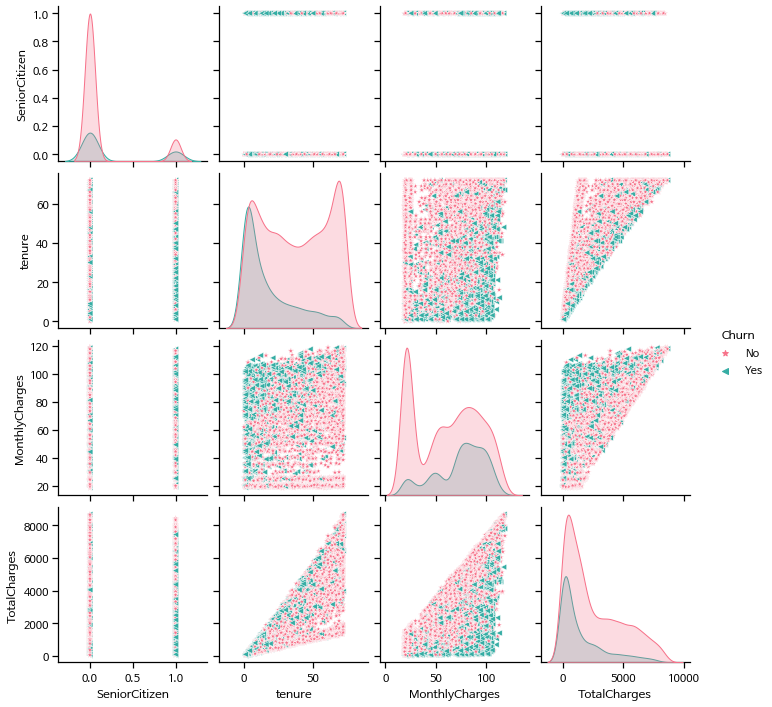

In [48]:
# 현재 numerical데이터의 관계 보기
sns.pairplot(data, hue = 'Churn', palette='husl', markers = ['*', "<"]);

1. 고령인 고객일수록 이탈할 확률이 높다.
2. 가입기간이 짧은 고객의 이탈이 높다.
3. 가입기간이 짧으면서 월청구액이 높다면 이탈할 확률이 더욱높아진다.
4. 전반적으로 월청구액이 높은 고객들이 이탈을 많이한다.

## 단기계약(약정)일수록 이탈할 가능성이 높지 않을까?

In [49]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



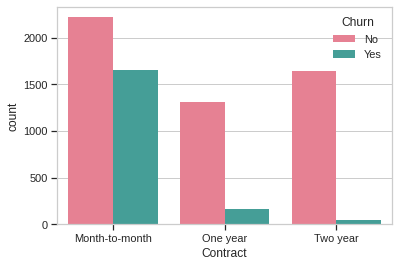

In [50]:
# 시각화
plt.figure(figsize= (6,4))
plt.style.use('seaborn-whitegrid') # setting "테마"(matplot으로)
#sns.set_style('darkgrid') seaborn 으로 setting
sns.set_context('notebook')


# countplot 시각화
sns.countplot(data['Contract'], hue = data['Churn'],palette='husl')

월별 계약일수록 이탈가능성이 높으며 장기계약인 2년계약시 가장 이탈율이 낮다

- 인사이트 :  **통신사를 이동했을때 최소 1년, 가능하다면 2년약정을 하는것이 고객유지에 가장좋으며, 이탈을 방지할 수 있다.**

## 오래 유지한 고객일 수록 이탈이 적지 않을까?

In [51]:
print(" 가장 짧은 기간 :", data['tenure'].min())
print(" 가장 오랜 기간 :", data['tenure'].max())

 가장 짧은 기간 : 0
 가장 오랜 기간 : 72


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



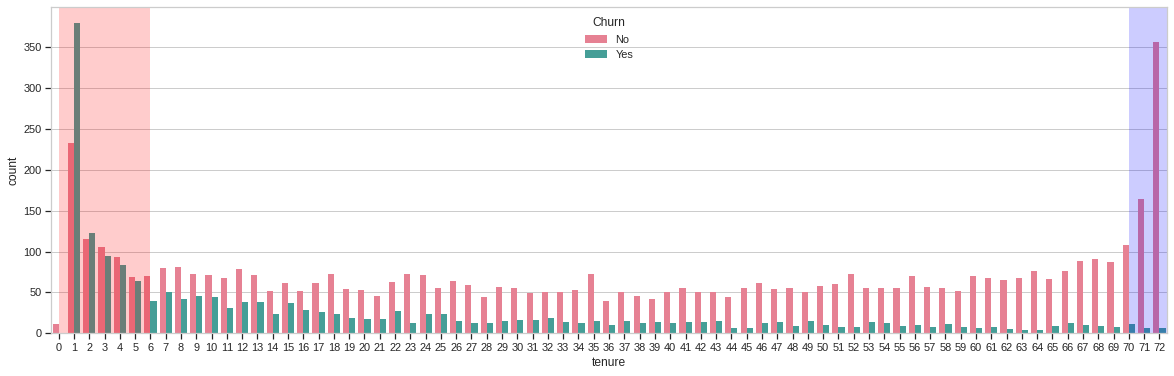

In [52]:
import matplotlib.patches as patches

sns.set_context('notebook')
fig, ax = plt.subplots(figsize =(20,6))
ax = sns.countplot(data['tenure'], hue = data['Churn'],palette='husl')

ax.add_patch(patches.Rectangle(
        (0, 0),
        6,
        400,
        #edgecolor = 'red',
        facecolor = 'red',
        #linewidth = 10,
        fill=True,
        alpha = 0.2
 )
)
ax.add_patch(patches.Rectangle(
        (70, 0),
        3,
       400,
        #edgecolor = 'blue',
        facecolor = 'blue',
        #linewidth = 10,
        fill=True,
        alpha = 0.2
 )
)
# 윤곽선이 필요없을때 
#ax.axvspan(15, 20, facecolor='blue',alpha = 0.2)

한달동안 고객으로 있었던 경우 이탈율이 매우 높은것을 알 수 있으며, 5개월 이하의 고객들 까지는 50명이상의 이탈을 보여주며 이탈하지 않은 고객보다 많거나 비슷하다.

In [53]:
# 5개월 이하 고객 이탈 수 와 이후 이탈 수 비교
print("5개월 보다 적게 머문 고객들중 이탈고객의 수: ",\
      data.loc[(data['tenure']<=5) & \
               (data['Churn']=='Yes')]['tenure'].value_counts().sum(),"명")

print("5개월 부터 72개월까지 오래 머문 고객들중 이탈고객의 수: ",\
      data.loc[(data['tenure']>5) & \
               (data['Churn']=='Yes')]['tenure'].value_counts().sum(),"명")

5개월 보다 적게 머문 고객들중 이탈고객의 수:  744 명
5개월 부터 72개월까지 오래 머문 고객들중 이탈고객의 수:  1125 명


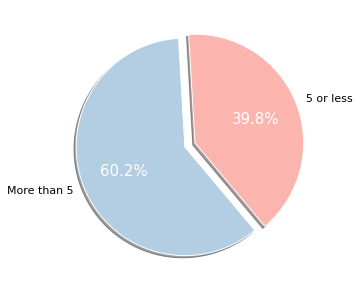

In [54]:
# 시각화

# 기본옵션 설정
plt.figure(figsize= (12,5))
sns.set_style('whitegrid')
sns.set_context('notebook')


# 파이차트 데이터 사이즈 
size1 = data.loc[(data['tenure']<=5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
size2 = data.loc[(data['tenure']>5) & (data['Churn']=='Yes')]['tenure'].value_counts().sum()
sizes = [size1, size2]

# 라벨 설정
labels = ["5 or less","More than 5"]

# 차트 그리기
patches, texts, autotexts = plt.pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0,0.1),
                                   startangle = 310)

# text옵션 설정
for t in texts:
    t.set_fontsize(11)
    t.set_color("black")
    
# autotexts옵션 설정
for at in autotexts:
    at.set_fontsize(15)
    at.set_color('white')
    
plt.show()

전체 이탈고객의 무려 약40%정도가 5개월이하의 계약에서 차지한다는것을 알게되었다. 즉, 파란색에 속한 고객들을 어떻게 장기계약으로 전환시킬지가 주요 쟁점이 된다.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


장기간 이용할 수록 이탈하는 고객들이 줄어든다
- 인사이트 : **대략 5개월을 초과한 기간 만큼 고객을 유지시킨다면 이탈률을 크게 낮출 수 있으므로 초반 가입 고객들에게 오래유지할 수 있는 서비스를 기획하거나 5개월 넘게 이용한 고객의 특징을 살펴본후 대입해 본다.**

- 현재 최 장기간 이용 고객들이 상당히 많이 있는것으로 보아 VIP고객을 잘 관리하고 있다는것을 알 수 있다. 하지만 좀 더 좋은 초반 서비스를 통해 초기 보유 고객의 니즈를 충족시켜 주어야할것 같다.

## 성별에 따른 이탈차이도 있을까?


In [56]:
print("남자 고객수 :", data.loc[data['gender']=='Male']['gender'].count())
print("여자 고객수 :",data.loc[data['gender']=='Female']['gender'].count())

남자 고객수 : 3555
여자 고객수 : 3488


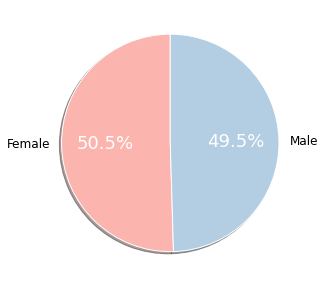

In [57]:
# 남,여 성비 시각화
plt.figure(figsize = (12, 5))

patches, texts, autotexts = plt.pie([3555,3488],
                                    labels = ['Female', 'Male'],
                                    autopct='%1.1f%%',
                                    shadow = True,
                                    startangle = 90
                                    )
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

for a in autotexts:
  a.set_fontsize(18)
  a.set_color('white')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



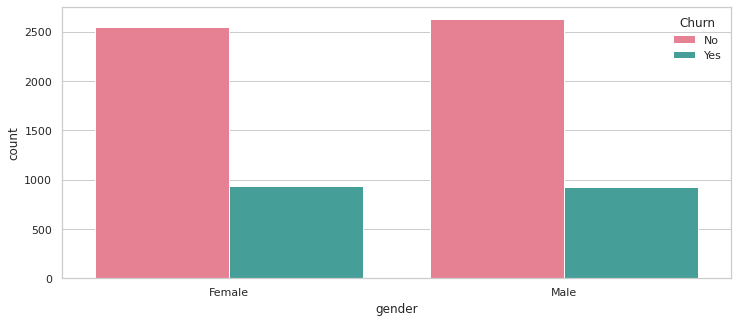

In [58]:
# 성별에 따른 이탈 시각화

plt.figure(figsize = (12, 5))

sns.countplot(data['gender'], hue = data.Churn, palette = 'husl')

성별에 따른 인사이트는 얻기 힘들어 보인다.

## 고령자와 이탈에는 어떤 관계가 있을까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



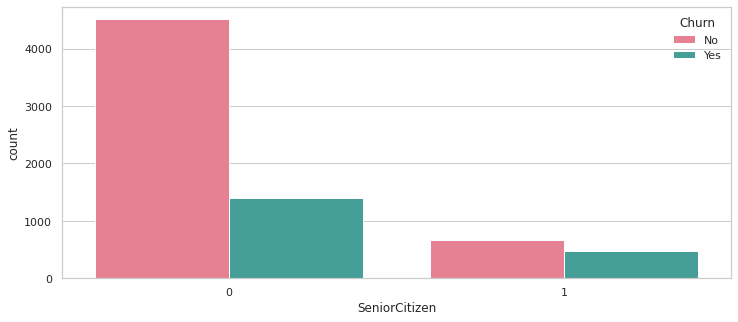

In [59]:
# 첫번째 시각화
plt.figure(figsize = (12, 5))
sns.countplot(data["SeniorCitizen"], hue = data["Churn"], palette='husl')
# 비고령자 = 0 , 고령자 = 1

bar-chart로는 차지하는 비율이 다르기때문에 시각적으로 잘 안들어온다.

In [60]:
data['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

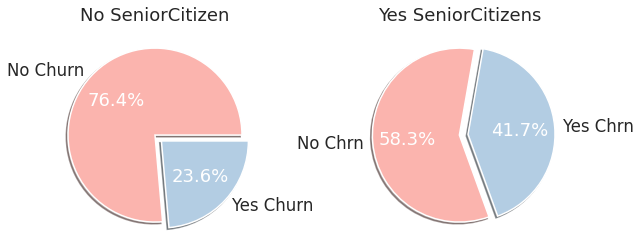

In [113]:
# 두번째 시각화 

# 기본 세팅
fig, ax = plt.subplots(1,2,figsize = (10,4))
sns.set_context('talk')


# 젊은 고객
labels = ["No Churn", "Yes Churn"]

no_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']=='No'),\
                    'SeniorCitizen'].value_counts().sum()
yes_sizes = data.loc[(data['SeniorCitizen']==0) & (data['Churn']=='Yes'),\
                     'SeniorCitizen'].value_counts().sum()
sizes = [no_sizes, yes_sizes]


patches, texts, autotexts = ax[0].pie(sizes,
                                   labels = labels,
                                   autopct = "%1.1f%%",
                                   shadow = True,
                                   explode = (0, 0.1))

ax[0].set_title("No SeniorCitizen")

for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')
    
    
# 고령 고객
Senior_labels = ["No Chrn", "Yes Chrn"]

Senior_y_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']=='No'),\
                          'SeniorCitizen'].value_counts().sum()

Senior_n_sizes = data.loc[(data['SeniorCitizen']==1) & (data['Churn']=='Yes'),\
                          'SeniorCitizen'].value_counts().sum()

Senior_sizes = [Senior_y_sizes, Senior_n_sizes]

patches, texts, autotexts = ax[1].pie(Senior_sizes,
                                     labels = Senior_labels,
                                     autopct = "%1.1f%%",
                                     shadow = True,
                                     explode = (0, 0.1),
                                     startangle = 80)


ax[1].set_title("Yes SeniorCitizens")
    
for t in autotexts:
    t.set_fontsize(18)
    t.set_color('white')



plt.show();

- 인사이트 : **고령자분들의 이탈이 무려 40%이상이며, 이탈방지를 위해서는 싼가격으로 장기계약 이벤트등의 여러가지 기획이 필요하다.(세계적으로 점점 출산율이 줄어들기 때문에 향후에는 이것이 최 우선순위가 될 수 도 있을것 같다)**




## 파트너 혹은 부양가족에 따른 이탈률을 알아보자


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Dependents and Churn correlation')

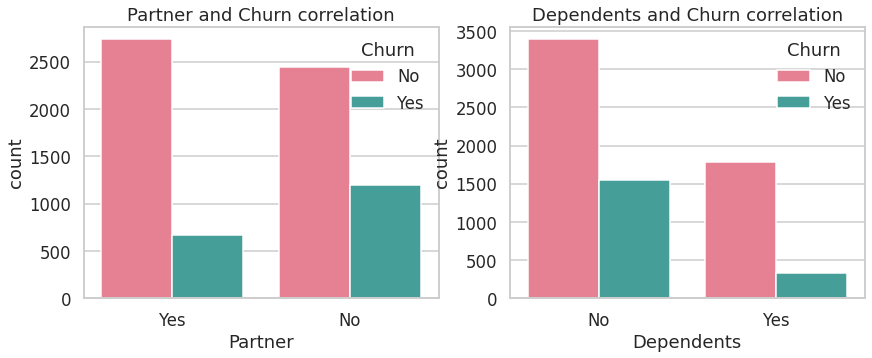

In [62]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize = (14,5))
sns.set_style('whitegrid')
sns.set_context('talk')


sns.countplot(data['Partner'], hue = data['Churn'], palette = 'husl',ax = ax[0])
ax[0].set_title('Partner and Churn correlation')

sns.countplot(data['Dependents'], hue =data['Churn'], palette = 'husl',ax = ax[1])
ax[1].set_title('Dependents and Churn correlation')

파트너, 혹은 부양가족이 없을때 이탈율이 더 높은것으로 보아 결합상품으로 인한 혜택을 받지 못함일 가능성이 있다. 이를 검토해 보고 친구 결합상품등의 다양한 상품을 기획해 볼 수 있다.

인터넷서비스/ 휴대폰서비스 구분하기
- 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies 의 수치를 확인하면 No internet service 에서 똑같은 수치를 확인할 수 있다 
- 인사이트 : 인터넷 서비스에 (온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies) 이 포함된다/ 휴대폰서비스에 (Phoneservice,MultipleLines)이 포함된다.


In [63]:
pd.crosstab(data['Partner'], data['StreamingTV'], normalize= True)

StreamingTV,No,No internet service,Yes
Partner,,,
No,0.236689,0.111884,0.168394
Yes,0.162289,0.104785,0.215959


In [64]:
pd.crosstab(data['Partner'], data['StreamingMovies'], normalize= True)

StreamingMovies,No,No internet service,Yes
Partner,,,
No,0.233139,0.111884,0.171944
Yes,0.162289,0.104785,0.215959


In [65]:
pd.crosstab(data['Partner'], data['OnlineBackup'], normalize= True)

OnlineBackup,No,No internet service,Yes
Partner,,,
No,0.260400,0.111884,0.144683
Yes,0.178049,0.104785,0.200199


In [66]:
pd.crosstab(data['Partner'], data['OnlineSecurity'], normalize= True)

OnlineSecurity,No,No internet service,Yes
Partner,,,
No,0.289223,0.111884,0.115860
Yes,0.207440,0.104785,0.170808


In [67]:
pd.crosstab(data['Partner'], data['TechSupport'], normalize= True)

TechSupport,No,No internet service,Yes
Partner,,,
No,0.282266,0.111884,0.122817
Yes,0.210848,0.104785,0.167400


In [68]:
pd.crosstab(data['Partner'], data['DeviceProtection'], normalize= True)

DeviceProtection,No,No internet service,Yes
Partner,,,
No,0.263808,0.111884,0.141275
Yes,0.175635,0.104785,0.202613


In [69]:
pd.crosstab(data['Partner'], data['InternetService'], normalize= True)

InternetService,DSL,Fiber optic,No
Partner,,,
No,0.177907,0.227176,0.111884
Yes,0.165838,0.212409,0.104785


폰 서비스
- 폰서비스에 MultipleLines 이 포함된다. 

In [70]:
pd.crosstab(data['Partner'], data['PhoneService'], normalize= True)

PhoneService,No,Yes
Partner,,
No,0.052676,0.464291
Yes,0.044157,0.438875


In [71]:
pd.crosstab(data['Partner'], data['MultipleLines'], normalize= True)

MultipleLines,No,No phone service,Yes
Partner,,,
No,0.281272,0.052676,0.183019
Yes,0.200057,0.044157,0.238819


인사이트 
- 인터넷 서비스를 사용하지않으면 다음 서비스( 온라인 보안 여부, 온라인 백업 여부, 장치보호 여부, 기술지원 여부, StreamingTV, StreamingMovies)를 같이 이용하지 않음을 보아 인터넷 서비스에 포함되는 내용인것으로 추측해 볼 수 있다. 
- MultipleLines 즉, 여러회선 여부는 폰서비스에 해당한다.

## 지불방법과 월청구비용에따른 이탈 정도

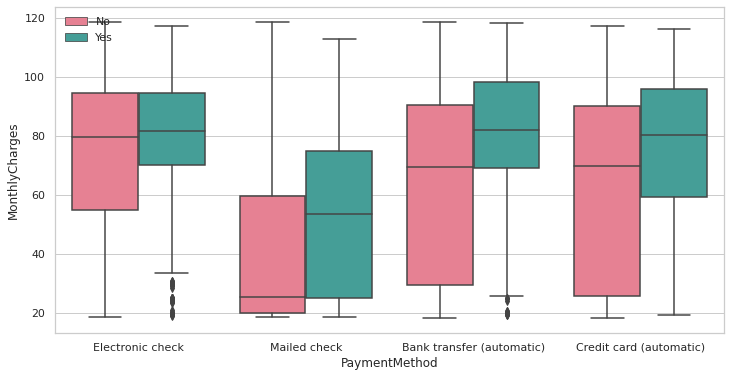

In [72]:
# 지불방법과 월청구비용에 따른 이탈정도
sns.set_context('notebook')
plt.figure(figsize = (12,6))
sns.boxplot(x = data['PaymentMethod'], y = data['MonthlyCharges'], hue = data['Churn'],palette = 'husl')
ax = plt.gca()
ax.legend(loc = 'upper left')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



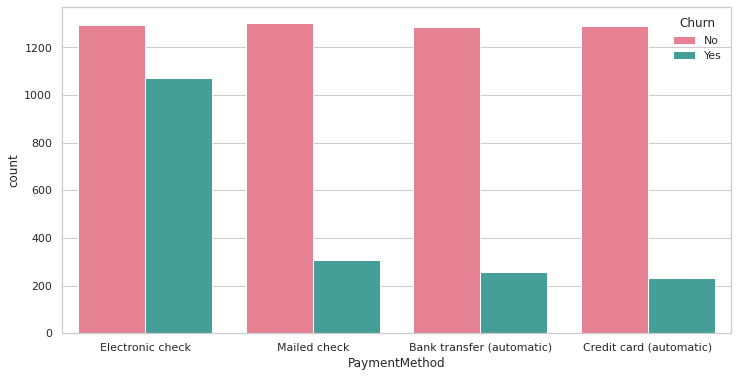

In [73]:
# 지불방법에 따른 이탈정도
plt.figure(figsize = (12,6))
sns.countplot(data['PaymentMethod'], hue =data['Churn'],palette = 'husl')

- Mailed check(우편 수표) 방법으로 청구방법을 사용하는 고객들의 월 청구금액이 가장낮다(실제로 수표에 작성하여 보내는것이기 때문에 그런것 같다.)
- Mailed check 방법으로 청구하는 사람들이 이탈자와 그렇지 않은사람들의 월청구액의 차이가 가장크다(첫번째 언급한것과 같이 직접 작성하여 보내는 방법이기 때문에 월청구액이 상대적으로 많이 나온사람들은 이탈할 가능성이 높은것 같다.)
- Electronic check(전자수표)결제를 한 사람들은 월청구액이 기본적으로 높게 분포해있으며 가장 이탈율이 높은 결제방식이다. 편리한 방식으로 결제를 할때는 상대적으로 많은 금액도 충동적으로 결제를 하게될 확률이 높기때문에 이로인해 평균적으로 높은 청구액이 나오고 그로인한 이탈율이 생기는것은 아닐까 라는 합리적의심을 해볼 수 있다. 아래에서 조금 더 살펴보자

In [74]:
# 전자수표 결제하는 사람들의 계약유형
data[data['PaymentMethod']=='Electronic check']['Contract'].value_counts()

Month-to-month    1850
One year           347
Two year           168
Name: Contract, dtype: int64

In [75]:
# 전자수표 결제하는 사람들의 계약 유지기간
data[data['PaymentMethod']=='Electronic check']['tenure'].value_counts().head(10)

1     290
2     115
3      93
4      86
5      61
7      55
9      52
13     52
8      50
10     47
Name: tenure, dtype: int64

In [76]:
# 전자수표 결제하는 사람들의 인터넷 서비스 회사
data[data['PaymentMethod']=='Electronic check']['InternetService'].value_counts()

Fiber optic    1595
DSL             648
No              122
Name: InternetService, dtype: int64

앞서 분석과정들에서 계약이 ***한달단위 계약***이며, ***짧은 유지기간***을 보이며, 인터넷 서비스를 ***Fiber optic*** 을 이용하는 고객들이 공통적으로 이탈율이 높았다. 따라서 이를 기반으로 비교를 해본 결과 전자수표 결제한 고객들은 모두 이러한 특성인 고객들이 다수인것으로 확인이 되었다. 따라서 수표방식의 문제인가 혹은 계약유형, 유지기간, 인터넷 서비스에 따른 영향인지 회사에서 실험을 해봐야할것이다.

## 인터넷 서비스 회사와 월청구비용에 따른 이탈률

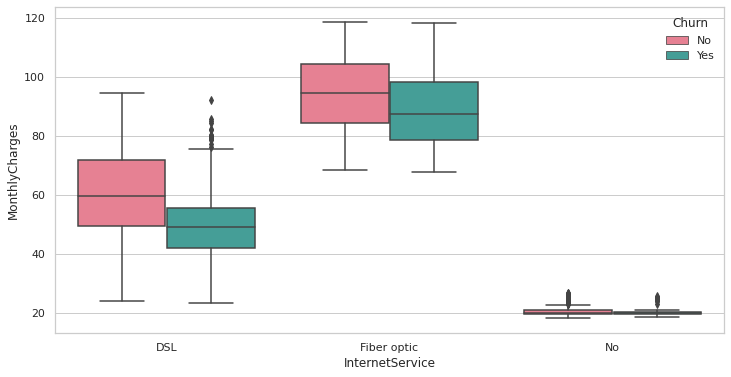

In [77]:
plt.figure(figsize =(12,6))
sns.boxplot(x = data['InternetService'], y = data['MonthlyCharges'], hue = data['Churn'],palette = 'husl')

Fiber optic의 경우 전체적으로 높은 월청구액을 기록하고있다. 하지만, 이탈하지 않은 고객의 청구액이 더 높다... 또다른 데이터를 같이 살펴보자

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



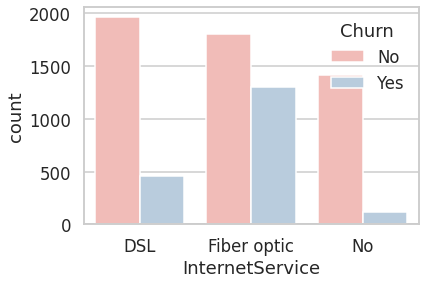

In [118]:
sns.countplot(data['InternetService'],hue=data['Churn'])

In [79]:
Table.groupby('InternetService_Fiber optic').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,고객유형_월지출우수 고객,고객유형_일반 고객,고객유형_장기알뜰 고객,고객유형_최우수 고객
InternetService_Fiber optic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.268411,32.917959,91.500129,3205.304570,0.501615,0.498385,0.516796,0.483204,0.786176,0.213824,0.000000,1.000000,0.374031,0.000000,0.625969,0.000000,0.000000,0.729005,0.000000,0.270995,0.566214,0.000000,0.433786,0.561693,0.000000,0.438307,0.720284,0.000000,0.279716,0.434755,0.000000,0.565245,0.434432,0.000000,0.565568,0.687339,0.174096,0.138566,0.226421,0.773579,0.208656,0.192829,0.515181,0.083333,0.581072,0.418928,0.505491,0.000000,0.000000,0.494509
0,0.079014,32.031504,43.794868,1558.065485,0.490346,0.509654,0.518039,0.481961,0.634909,0.365091,0.172764,0.827236,0.565803,0.172764,0.261433,0.613821,0.386179,0.315041,0.386179,0.298780,0.338923,0.386179,0.274898,0.344258,0.386179,0.269563,0.315549,0.386179,0.298272,0.371697,0.386179,0.242124,0.364837,0.386179,0.248984,0.443852,0.237043,0.319106,0.549543,0.450457,0.227642,0.234756,0.195630,0.341972,0.854675,0.145325,0.255335,0.307927,0.255589,0.181148


Fiber optic을 사용하는 고객의 특징은 고령자가 많고, 월청구액이 높으며, 총청구액역시 높다 또한 모든고객이 휴대폰 서비스를 사용하고 심지어 다중회선(MultipleLines)역시 무려 62%의 고객이사용한다. 계약은 한달 단기계약을 대부분 하며 월지출우수고객과 최우수고객 두 고객군으로만 이루어져있다.

즉, Fiber optic을 사용하는 고객은 지출이 많은고객으로 이루어져있고, 지출이 많은 고객군중 월지출우수고객은 장기간 머무르지 않는 고객이 많으므로 이탈과도 어느정도 상관성을 보인다고 볼 수 있다.

# 클러스터링과 EDA를 종합하여 인사이트 도출 및 전략구상하기


## 클러스터링과 EDA인사이트 모아보기


**< EDA 인사이트 정리 >**
1. (고령자) 고령자분들의 이탈이 많다.
2. 단기계약일수록 이탈할 가능성이 높다(5개월 이하로 이용한 유저들이 전체 이탈율의 40%를 차지한다.)
3. 가입기간이 짧으면서 월 청구액이 높다면 이탈확률이 더욱높아진다.
4. 성별에 따른 고객의 이탈의 차이는 보여주지 않고있다.
5. 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 것으로 보아 결합상품의 혜택을 받지 못할 가능성이 있으므로 직장동료, 혹은 친구,지인들과의 결합상품을 추가적으로 기획 해보는것도 좋은 방법이라고 생각한다.
6. 청구방법중 Mailed check(우편 수표)를 사용하는 고객들이 월 청구금액이 가장낮다.
7. Mailed check(우편 수표)로 청구하는 사람들은 이탈자와 그렇지않은 고객간의 월청구액의 차이가 가장많이난다. 직접 보내는 만큼 많이 나옴에 따른 부담감이라고 생각해 볼 수 있다.
8. Electronic check(전자 수표)결제를 한 사람들은 월 청구액이 기본적으로 높게 분포해 있으며 가장 이탈율이 높은 결제방식이다.
9. Electronic check(전자 수표)를 이용하는 고객들은 짧은 유지기간과 한달단위의 계약 인터넷서비스 Fiber optic을 이용하는 이탈율이 높은 요건에 모두 다수로 속한다. 이것이 Electronic check(전자 수표)의 문제인지 혹은 기간,계약,인터넷서비스의 문제인지 확인해봐야한다.
10.Fiber optic을 사용하는 고객의 특징은 고령자가 많고, 월청구액이 높으며, 총청구액역시 높다 또한 모든고객이 휴대폰 서비스를 사용하고 심지어 다중회선(MultipleLines)역시 무려 62%의 고객이사용한다. 계약은 한달 단기계약을 대부분 하며 월지출우수고객과 최우수고객 두 고객군으로만 이루어져있다. 즉, Fiber optic을 사용하는 고객은 지출이 많은고객으로 이루어져있고, 지출이 많은 고객군중 월지출우수고객은 장기간 머무르지 않는 고객이 많으므로 이탈과도 어느정도 상관성을 보인다고 볼 수 있다.



**< 클러스터링 인사이트정리 >**

< 이탈한 고객의 특징 >
- 노년층이 비 이탈자 보다 2배 많다.
- 가입 유지기간이 비 이탈고객보다 2배 짧다 (17m - 37m)
- 이탈고객의 월청구액이 평균 10달러 높다
- 파트너가 없는경우가 64%이다.
- 부양가족이 없는 경우가 82%이다.
- 인터넷 서비스중에서 Fiber optic 을 사용하는 고객이 무려 69%이다.
- OnlineSecurity를 사용하지 않는 사람이 78%이며, OnlineBackup을 사용하지 않는사람은 65%이다.
- DeviceProtection을 64%가 이용하지 않는다.
- TechSupport를 이용하지 않는 사람이 77%이다. 
- 약89%의 고객이 한달계약을 하고있다.
- 약75%의 고객이 종이없는청구서를 이용하고 있으며 그중 다수가 Electronic check(전자수표)를 이용한다.
- 가장 많은 고객유형은 "월지출 우수고객" 이다

< 월지출 우수 고객 특징 >
- 한달계약이 73%이다. 
- 80%가 부양가족이 없다.
- 97%가 휴대폰 서비스를 이용한다.
- 60%가 인터넷 서비스에서  Fiber optic을 사용한다.
- 온라인 보안은 77%가 사용하지않는다.
- 온라인 백업을 사용하지 않는사람은 72%이다.
- 장치보호를 사용하지 않는 사람이 72%이다. 
- Tech support 를 사용하지 않는 사람이 약 77%이다.
- 월간 계약이 약 88%이다.
- 69%가 종이없는 영수증이며 그 중 전자수표가 51% 이다. 
- 약 48%의 이탈율

< 일반 고객 >
- 인터넷 서비스 Fiber optic을 사용하는 사람이 없다.
- 72%가 인터넷 서비스를 사용하지 않는다.
- 64%가 월간계약을 하고 22%는 1년계약 13%는 2년계약을 한다.
- 약 36%의 사람들이 종이없는 계약서를 사용한다.
- 54%의 사람들이 우편으로 결제를 한다.
- 18%의 낮은 이탈율을 보인다.

< 장기 알뜰 고객 >
- 60%넘는 고객들이 파트너가 있다.
- 폰서비스를 사용하지 않는 사라은 약 24%이다.
- 인터넷 서비스 Fiber optic을 사용하는 고객이 없고,
 63%는 사용하지 않고, 36%는 DSL을 사용한다.
- 계약을 경우 월간계약은 약 17%, 1년계약 27%, 2년계약 56%로 장기계약고객이
많다.
- 종이없는 영수증을 사용하는사람이 약 40%로 과반수는 종이있는 영수증을 선호한다.
- 전자수표를 가장 선호하지않고 나머지를 골고루 선호한다.
- 94%가 이탈하지 않았다.

< 최우수고객 >
- 파트너가 있는 고객이 67%이다.
- 약 97%가 폰서비스를 이용한다.
- 인터넷 서비스는 Fiber optic를 이용하는 고객이 68%이다.
- 스트리밍 티비를 이용하는 고객이 71%이다. 
- 스트리밍 영화역시 약 72%의 고객이 이용한다.
- 계약의 경우 월간계약이 약 30% 1년계약이 약30% 2년계약이 약40%이다.
- 약 70%가 종이없는 결제방식을 사용한다.
- 지불방식은 은행송금(자동) 30%, 신용카드(자동)30%, 전자수표31%, 우편수표 0.07% 의 분포를 보인다



<합쳐보기>

## 클러스터링과 EDA인사이트 합쳐서 최종인사이트 뽑아내기

In [80]:
# 1. 고령자 이탈
Table.groupby('SeniorCitizen').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,고객유형_월지출우수 고객,고객유형_일반 고객,고객유형_장기알뜰 고객,고객유형_최우수 고객
SeniorCitizen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,33.295972,79.820359,2810.465193,0.497373,0.502627,0.498249,0.501751,0.920315,0.079685,0.091068,0.908932,0.326620,0.091068,0.582312,0.226795,0.727671,0.045534,0.707531,0.045534,0.246935,0.537653,0.045534,0.416813,0.546410,0.045534,0.408056,0.726795,0.045534,0.227671,0.453590,0.045534,0.500876,0.433450,0.045534,0.521016,0.706655,0.166375,0.126970,0.232925,0.767075,0.204028,0.193520,0.520140,0.082312,0.583187,0.416813,0.439580,0.063047,0.070053,0.427320
0,32.252292,61.885594,2181.089550,0.494907,0.505093,0.521222,0.478778,0.659083,0.340917,0.097793,0.902207,0.511375,0.097793,0.390832,0.366214,0.384550,0.249236,0.456537,0.249236,0.294228,0.419864,0.249236,0.330900,0.419355,0.249236,0.331409,0.448557,0.249236,0.302207,0.388964,0.249236,0.361800,0.388115,0.249236,0.362649,0.520883,0.217657,0.261460,0.441087,0.558913,0.222241,0.220713,0.300679,0.256367,0.763497,0.236503,0.351104,0.193548,0.157216,0.298132


In [125]:
list_len = []
for i in Table.index:
  if Table['SeniorCitizen'][i] ==1 and Table['고객유형_월지출우수 고객'][i]==1:
    list_len.append(i)

print(len(list_len))

502


In [110]:
Table['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51648 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52636 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50864 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51648 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

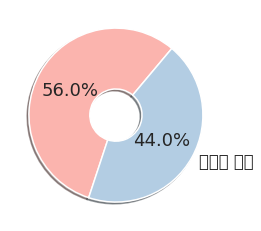

In [123]:
label = ['', '월지출 우수']
pop = [1142-502, 502]
wg = {'width':0.7}

plt.pie(pop, labels = label, autopct='%.1f%%', explode=[0,0], shadow=True, wedgeprops=wg, startangle=50)
plt.show

노년층이 이탈한 비율이 많고, 약86%가 "월지출 우수고객 과 "최우수고객"에 해당된다. 최우수 고객 그룹에 속한 노년층 고객의 경우 장기간 가입을 유지하므로 그대로 두고 가입기간이 짧은 **노년층중 월지출 우수고객에 해당하는** 44%의 고객에게 장기계약시 요금할인과 같은 혜택을 부여하면 좋을것같다.

In [127]:

Table.groupby('Contract_Month-to-month').mean().sort_values(by='tenure',ascending=False).style.background_gradient(cmap = 'Blues')


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,고객유형_월지출우수 고객,고객유형_일반 고객,고객유형_장기알뜰 고객,고객유형_최우수 고객
Contract_Month-to-month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.106113,50.078556,62.833972,3405.228761,0.493506,0.506494,0.362369,0.637631,0.585049,0.414951,0.096294,0.903706,0.433323,0.096294,0.470383,0.377890,0.306620,0.315489,0.274311,0.315489,0.410200,0.253088,0.315489,0.431422,0.221729,0.315489,0.462781,0.250871,0.315489,0.433640,0.239468,0.315489,0.445043,0.232499,0.315489,0.452011,0.466265,0.533735,0.498891,0.501109,0.301869,0.309788,0.163130,0.225214,0.932214,0.067786,0.096294,0.137472,0.266075,0.500158
1,0.208258,18.036645,66.398490,1369.254581,0.496774,0.503226,0.643871,0.356129,0.796387,0.203613,0.097032,0.902968,0.520516,0.097032,0.382452,0.315613,0.549161,0.135226,0.678968,0.135226,0.185806,0.590452,0.135226,0.274323,0.617806,0.135226,0.246968,0.691613,0.135226,0.173161,0.529806,0.135226,0.334968,0.528258,0.135226,0.336516,0.000000,0.000000,0.332645,0.667355,0.152000,0.140129,0.477419,0.230452,0.572903,0.427097,0.584774,0.200774,0.042839,0.171613


# LTV와 CAC

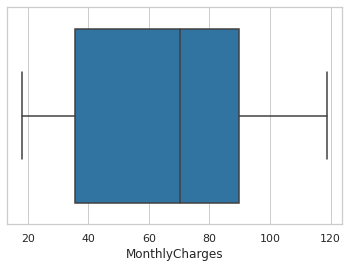

In [ ]:
sns.boxplot(x = data['MonthlyCharges']) 

In [ ]:
ARPPU = data['MonthlyCharges'].mean()
churn_rate = data['Churn'].mean()
LTV = ARPPU / churn_rate
print(f'ARPPU는 {ARPPU}이며, 이탈률은 {churn_rate}입니다.')
print(f"LTV는 {round(LTV,2)}달러 입니다.")

ARPPU는 64.79820819112632이며, 이탈률은 0.26578498293515357입니다.
LTV는 243.8달러 입니다.


In [ ]:
CAC = LTV * 0.25
print(f"CAC는 {round(CAC,2)}달러 정도 나온다면 적당할 것이다.")

CAC는 60.95달러 정도 나온다면 적당할 것이다.


# EDA결과

## 📋 < 거시적 결과 > 

- 우수고객 

1. 배우자가 있는 경우 결합서비스를 통해 비용적인 이점을 챙길 수 있기 때문에 우수고객의 66%는 배우자가 있는 고객들로 구성됨을 생각해 볼 수 있다. 하지만 일반고객의 60%와 우수고객중 파트너가 없는고객들을 위해서 친구들 간의 결합서비스를 통해 유입을 늘리는 방법을 시도해볼 만 하다.

2. 여러회선의(Multiplelines) 경우 일반 고객의 경우 잘 사용하지 않기 때문에 우수고객의 70%가 사용하지만 이 고객층에서 사용하는 유저들은 진짜 필요한 고객이므로 실제로 필요한 해당 유저들의 Retension을 지속적으로 가져가기 위해서 10개월 이용시 2개월 무료등의 서비스를 통해 우수고객에 대한 신뢰와 Retension을 지켜나갈 수 있는 것을 기획해야한다.

3. 온라인 보안과 빽업은 두가지가 묶으으로 가져가도 괜찮을 카테고리이기 때문에 이벤트성으로 결합상품 형식으로 출시하여 A/B테스트를 통해 효과를 확인 해볼수 있을것이다.

4. 우수고객들의 이탈율은 17%정도로 우수고객에게는 지속적인 보답서비스를 통해 유지 시키는것이 주된 전략이 될것이다.


- 일반고객

1. 평균 20개월 정도 머무르며 67%가 한달 계약을 하는 고객들로 이루어져 있어 일반고객들을 어떻게 장기계약 고객으로 전환하느냐가 주요 관점이다.

2. 60%가 넘는 고객들이 파트너가 없는 고객으로 분포되어 있어 일반인들 간의 (ex> 친구) 결합 상품을 통해 동시가입과 장기 계약을 유도해 볼 수 있다.

3. 인터넷 서비스를 사용하지 않는 사람들이 고정적으로 30% 이상 있기 때문에 인터넷 서비스 무료체험을 통해 인터넷 서비스의 강점을 어필 하는 방법을 구상

4. 31%가 이탈을 하며 단기계약이 많이 있기때문에 장기계약으로 이탈을 막는것이 가장 좋아보인다.

- 크롤링한 날짜기준 LTV가 243.8달러이며 CAC는 60.95달러로 60.95달러 선에서 서비스를 구상해 볼 수 있다.





## 📋 < 미시적 결과 >
- 단기계약일수록 이탈할 가능성이 높다 -> 최소 1년, 가능하다면 2년계약(약정)을 통해 장기간 약정으로 고객을 유치하는것이 가장 좋다.
- 5개월 이하로 이용한 유저들이 전체 이탈율의 40%를 차지하므로 그 기간동안 계속해서 사용할 수 있도록 서비스를 제공하는 방법도 좋은접근이라고 생각한다.
- 기간과 상관없이 비용이 높은사람들이 해지를 많이 하므로 일정 비용이상 지출에 근접한다면 알람 서비스를 만들어 조절할 수 있도록 개선한다.
- 성별에 따른 고객의 이탈의 차이는 보여주지 않고있다.
- 고령자 고객분들의 이탈률이 높으므로 고령자 분들을 위한 서비스를 기획해야할 필요가 있다(장기간 계약시 할인된 가격으로 이용 등), 향후 젊은 고객층이 고령자가 되었을시 이탈 방지를 위함
- 파트너 혹은 부양가족이 없는 고객들의 이탈률이 더 높은 것으로 보아 결합상품의 혜택을 받지 못할 가능성이 있으므로 직장동료, 혹은 친구,지인들과의 결합상품을 추가적으로 기획 해보는것도 좋은 방법이라고 생각한다.
- 폰서비스로 인해 높은 요금이 나오는 사람들또한 이탈할 확률이 적지 않으므로 계속해서 높은 요금을 사용하는 고객들에게 매년 1번~2번의 요금 할인 서비스 등의 크지않은 이벤트가 있으면 좋을것 같다.

# 이탈방지를 위한 예측 모델 만들기(향후 모델을 만들 계획)